<a href="https://colab.research.google.com/github/tomfox1/DS-Unit-2-Sprint-1-Linear-Algebra/blob/master/Linear_Algebra_Sprint_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Linear Algebra

In [0]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns 
import sklearn
import statistics as st

## 1.1 Graph vector $\vec{a}$ 

\begin{align}
\vec{a} = \begin{bmatrix} 3 \\ 2 \end{bmatrix}
\end{align}

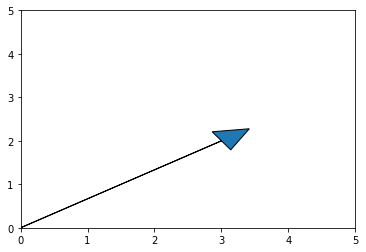

In [274]:
plt.xlim(0, 5)
plt.ylim(0, 5)

a = np.array([[3], [2]])

plt.arrow(0,0, 3, 2, head_width=0.5, head_length=0.5);

## 1.2 Find $||\vec{b}||$. What does the norm of a vector represent?
\begin{align}
\vec{b} = \begin{bmatrix} 17 & -4 & -2 & 1\end{bmatrix}
\end{align}


In [275]:
#the norm of a vector represents its magnitude

b = np.array([17, -4, -2, 1])

print("norm of b vector:", np.linalg.norm(b))

norm of b vector: 17.60681686165901


## 1.3 Find $\vec{c} \cdot \vec{d}$

\begin{align}
\vec{c} = \begin{bmatrix}3 & 7 & -2 & 12\end{bmatrix}
\qquad
\vec{d} = \begin{bmatrix}9 & -7 & 4 & 6\end{bmatrix}
\end{align}

In [277]:
c = np.array([3, 7, -2, 12])
d = np.array([9, -7, 4, 6])

print("the dot product of vectors c and d:", np.matmul(c, d))

the dot product of vectors c and d: 42


## 1.4 Find $E^{-1}$ and $E^{T}$

\begin{align}
E = 
\begin{bmatrix}
    7 & 4 & 2 \\
    1 & 3 & -1 \\
    2 & 6 & -4
\end{bmatrix}
\end{align}

In [278]:
e = np.array([[7, 4, 2], [1, 3, -1], [2, 6, -4]])
print(" \n inverse of E: \n", np.linalg.inv(e))

e_t = e.T

print("transpose of E: \n", e_t)

 
 inverse of E: 
 [[ 0.17647059 -0.82352941  0.29411765]
 [-0.05882353  0.94117647 -0.26470588]
 [ 0.          1.         -0.5       ]]
transpose of E: 
 [[ 7  1  2]
 [ 4  3  6]
 [ 2 -1 -4]]


# Intermediate Linear Algebra

## 2.1 Suppose that the number of customers at a ski resort as well as the number of inches of fresh powder (snow)  was recorded for 7 days. 

### Customers: [820, 760, 1250, 990, 1080, 1450, 1600]

### Inches of new snow: [0, 1, 7, 1, 0, 6, 4 ]

## Find the mean, variance, and standard deviation for both the number of customers and inches of new snow for the week. You may use library functions, dataframes, .describe(), etc. 



In [54]:
import pandas as pd

customers = [820, 760, 1250, 990, 1080, 1450, 1600]
snow = [0, 1, 7, 1, 0, 6, 4]

df = pd.DataFrame({'customers': customers, 'snow': snow})

df.head()

,customers,snow
0,820,0
1,760,1
2,1250,7
3,990,1
4,1080,0


In [291]:
print("\n mean customers:", st.mean(customers), 
      "\n mean snow:", st.mean(snow), 
      "\n\n variance customers:", st.variance(customers),
      "\n variance snow:", st.variance(snow),
      "\n\n standard deviation customers:", st.stdev(customers),
      "\n standard deviation snow:", st.stdev(snow))


 mean customers: 1135.7142857142858 
 mean snow: 2.7142857142857144 

 variance customers: 98761.90476190476 
 variance snow: 8.571428571428571 

 standard deviation customers: 314.26406851866597 
 standard deviation snow: 2.9277002188455996


## 2.2 Are the variances of the number of customers and inches of snow comparable? 
## Why or why not? 

In [0]:
#The variance is not comparable since number of customers and inches of snow use different scales, we would have to normalize data 
#in order to be comparable; to exemplify, before performing PCA, we need to normalize our data with mean=0 and var=1 in order to
#meaningfully compare our data 

## 2.3 Find the variance-covariance matrix for the number of customers and inches of snow at the ski resort. 

In [299]:
print("variance-covariance matrix:\n", np.cov(customers, snow, ddof=1))

variance-covariance matrix:
 [[9.87619048e+04 6.70238095e+02]
 [6.70238095e+02 8.57142857e+00]]


# PCA

## 3.1 Standardize the data so that it has a mean of 0 and a standard deviation of 1. (You may use library functions)

We have included some code to get you started so that you don't get stuck on something that isn't standardizing the data or PCA.

This might be helpful:

<https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html>

In [300]:
# Let me get you some data to start you off.
import pandas as pd

data = {"Country": ["England","Wales","Scotland","North Ireland"], 
        "Cheese": [105,103,103,66], 
        "Carcass_Meat": [245,227,242,267], 
        "Other_Meat": [685, 803, 750, 586], 
        "Fish": [147, 160, 122, 93], 
        "Fats_and_Oils": [193, 235, 184, 209], 
        "Sugars": [156, 175, 147, 139], 
        "Fresh_Potatoes": [720, 874, 566, 1033], 
        "Fresh_Veg": [253, 265, 171, 143], 
        "Other_Veg": [488, 570, 418, 355], 
        "Processed_Potatoes": [198, 203, 220, 187], 
        "Processed_Veg": [360, 365, 337, 334], 
        "Fresh_Fruit": [1102, 1137, 957, 674], 
        "Cereals": [1472, 1582, 1462, 1494], 
        "Beverages": [57,73,53,47], 
        "Soft_Drinks": [1374, 1256, 1572, 1506], 
        "Alcoholic Drinks": [375, 475, 458, 135], 
        "Confectionery": [54, 64, 62, 41]}

df = pd.DataFrame(data)

# Look at the data
df.head()

,Country,Cheese,Carcass_Meat,Other_Meat,Fish,Fats_and_Oils,Sugars,Fresh_Potatoes,Fresh_Veg,Other_Veg,Processed_Potatoes,Processed_Veg,Fresh_Fruit,Cereals,Beverages,Soft_Drinks,Alcoholic Drinks,Confectionery
0,England,105,245,685,147,193,156,720,253,488,198,360,1102,1472,57,1374,375,54
1,Wales,103,227,803,160,235,175,874,265,570,203,365,1137,1582,73,1256,475,64
2,Scotland,103,242,750,122,184,147,566,171,418,220,337,957,1462,53,1572,458,62
3,North Ireland,66,267,586,93,209,139,1033,143,355,187,334,674,1494,47,1506,135,41


In [308]:
#import StandardScaler to normalize data 
from sklearn.preprocessing import StandardScaler

#in order to normalize our data we drop the "Country" column since it is a string value and we solely need numeric values to normalize
scaler = StandardScaler()
df_standard = df.drop(columns="Country")

#we fit the data by computing the mean and standard deviation
scaler.fit(df_standard)

#after data has been fitted we transform/standardize our data 
t = scaler.transform(df_standard)

#the df below shows our original df with normalized data 
standerdized_data = pd.DataFrame(data=t, columns = [
                                 "Cheese",
                                 "Carcass_Meat",
                                 "Other_Meat",
                                 "Fish",
                                 "Fats_and_Oils",
                                 "Sugars",
                                 "Fresh_Potatoes",
                                 "Fresh_Veg",
                                 "Other_Veg",
                                 "Processed_Potatoes",
                                 "Processed_Veg",
                                 "Fresh_Fruit",
                                 "Cereals",
                                 "Beverages",
                                 "Soft_Drinks",
                                 "Alcoholic Drinks",
                                 "Confectioneryt"])
standerdized_data

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  # This is added back by InteractiveShellApp.init_path()


,Cheese,Carcass_Meat,Other_Meat,Fish,Fats_and_Oils,Sugars,Fresh_Potatoes,Fresh_Veg,Other_Veg,Processed_Potatoes,Processed_Veg,Fresh_Fruit,Cereals,Beverages,Soft_Drinks,Alcoholic Drinks,Confectioneryt
0,0.658275,-0.017495,-0.259546,0.644585,-0.632429,0.130551,-0.450076,0.863312,0.377736,-0.336265,0.805477,0.737407,-0.644322,-0.051917,-0.435231,0.104998,-0.138303
1,0.535805,-1.277169,1.198856,1.152440,1.535899,1.547958,0.435696,1.093528,1.401682,0.084066,1.171603,0.929297,1.679463,1.609440,-1.404236,0.841823,0.968122
2,0.535805,-0.227441,0.543811,-0.332059,-1.097071,-0.540853,-1.335847,-0.709834,-0.496364,1.513193,-0.878702,-0.057567,-0.855575,-0.467257,1.190727,0.716563,0.746837
3,-1.729885,1.522105,-1.483121,-1.464967,0.193601,-1.137656,1.350227,-1.247006,-1.283054,-1.260994,-1.098378,-1.609137,-0.179565,-1.090266,0.648741,-1.663384,-1.576656


## 3.2 Perform PCA on the data and graph Principal Component 1 against Principal Component 2. (You may use library functions)

This might be helpful:

<https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html>

In [314]:
from sklearn.decomposition import PCA

#2 principal components are chosen, a Scree plot could be drawn to show if 2 principal components shows proportion variance of +90%
pca = PCA(2)

pca.fit(df_standard)

#our 2 principal components combined explain approximately 97% of the variance
print(pca.explained_variance_ratio_)


#creating a pd df helps us visualize our data which we'll later use for plotting
data = {"principal component 1": pca.components_[0], "principal component 2": pca.components_[1]}

df_pca = pd.DataFrame(data)
df_pca

[0.67444346 0.29052475]


,principal component 1,principal component 2
0,-0.056955,0.016013
1,0.047928,0.013916
2,-0.258917,-0.015331
3,-0.084415,-0.050755
4,-0.005194,-0.095389
5,-0.037621,-0.043022
6,0.401402,-0.715017
7,-0.151850,-0.144900
8,-0.243594,-0.225451
9,-0.026886,0.042851


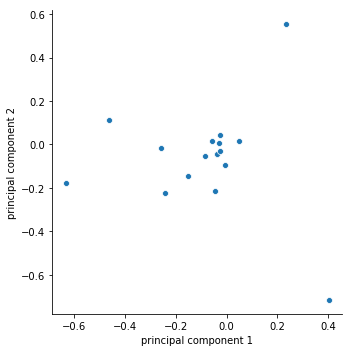

In [316]:
sns.relplot(x="principal component 1", y="principal component 2", data=df_pca);

# Clustering

## 4.1 Use K-Means to cluster the following data and then graph your results. (You may use library functions)

We have included some code to get you started so that you don't get stuck on something that isn't standardizing clustering.

Prioritize calculating the clusters over graphing them. 

Scikit-Learn K-Means Documentation:

<https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html>

In [318]:
points = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/points.csv')
points.head()

,x,y
0,-7.846803,-3.421277
1,-3.554323,-6.884729
2,-0.192822,-9.671030
3,-6.401456,-5.223972
4,-0.804026,-9.704457


In [0]:
from sklearn.cluster import KMeans

#calculating KMeans with 5 clusters with initial random positions for our centroids
kmeans = KMeans(n_clusters=5, init="random", random_state=None).fit(points)

In [320]:
#these are our centroids
centroids = kmeans.cluster_centers_
centroids

array([[ 6.24979318,  3.84457183],
       [-8.36652987, -3.61238083],
       [-0.47611541, -9.49475417],
       [-3.7805392 , -7.60590614],
       [-3.59740679,  4.13344099]])

In [321]:
#creating pd df of clusters in order to plot them later 
a = centroids[:,0]
b = centroids[:,1]

data = {"x": a, "y": b}

c = pd.DataFrame(data)
c

,x,y
0,6.249793,3.844572
1,-8.366530,-3.612381
2,-0.476115,-9.494754
3,-3.780539,-7.605906
4,-3.597407,4.133441


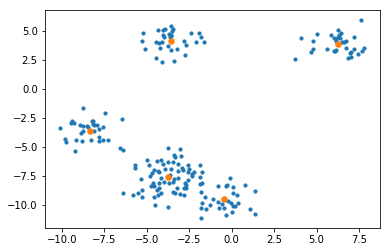

In [322]:
#our algorithm imported from sklearn iterates our centroid calculation until centroids converge to their respective clusters

ax = plt.subplot(1,1,1)
ax.scatter(points.x, points.y, s=10);
ax.scatter(c["x"], c["y"], s=30);